# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведем исследовательский анализ данных и установим параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она сможет отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Описание данных**

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м);  
- balcony — число балконов;  
- ceiling_height — высота потолков (м);  
- cityCenters_nearest — расстояние до центра города (м);  
- days_exposition — сколько дней было размещено объявление (от публикации до снятия);  
- first_day_exposition — дата публикации
- floor — этаж;  
- floors_total — всего этажей в доме;  
- is_apartment — апартаменты (булев тип);  
- kitchen_area — площадь кухни в квадратных метрах (м²);  
- last_price — цена на момент снятия с публикации;  
- living_area — жилая площадь в квадратных метрах (м²);  
- locality_name — название населённого пункта;  
- open_plan — свободная планировка (булев тип);  
- parks_around3000 — число парков в радиусе 3 км;  
- parks_nearest — расстояние до ближайшего парка (м);  
- ponds_around3000 — число водоёмов в радиусе 3 км;  
- ponds_nearest — расстояние до ближайшего водоёма (м);  
- rooms — число комнат;  
- studio — квартира-студия (булев тип);  
- total_area — общая площадь квартиры в квадратных метрах (м²);  
- total_images — число фотографий квартиры в объявлении.

# Инструкция по выполнению проекта

## Откройте файл с данными и изучите общую информацию

### Открытие файла с данными

Импортируем библиотеку pandas и библиотеки для работы с графиками. Считаем данные из csv-файла в датафрейм и сохраним в переменную data. 
Путь к файлу: /datasets/real_estate_data.csv

In [1]:
import pandas as pd # импорт библиотеки pandas
import seaborn as sns # импорт библиотеки seaborn
import matplotlib.pyplot as plt # импорт библиотеки matplotlib
pd.set_option('display.max_columns', None) # настройка опции для отображения всех столбцов в таблице

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t') # считали файл из csv-файла real_estate_data.csv в переменную data
data.head(10) # вывели первые 10 строк датафрейма 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Изучение общей информации файла с данными

Выведем основную информацию о датафрейме, посмотрим основные статистические показатели по числовым признакам и построим гистограммы для числовых столбцов.

In [3]:
data.info() #вывели информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.describe() # посмотрели основные статистические детали числовых столбцов датафрейма по признакам

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


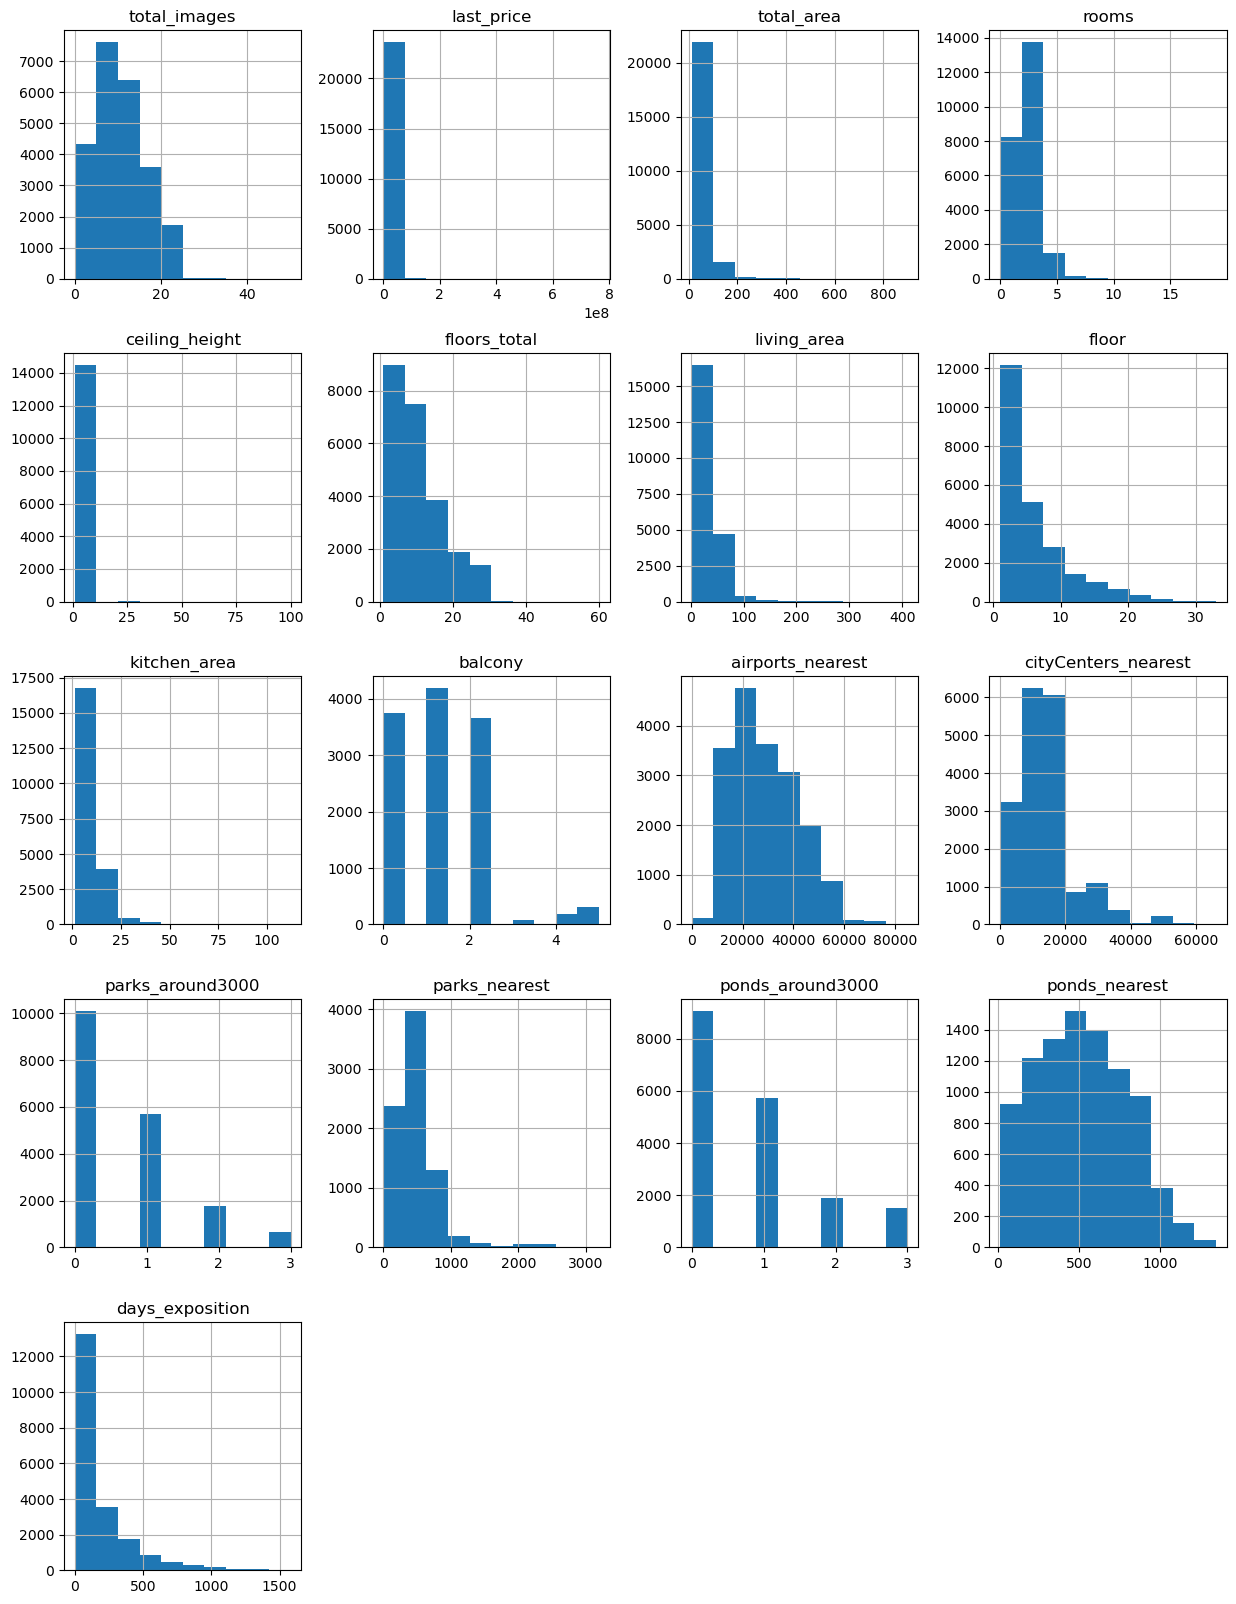

In [5]:
data.hist(figsize=(15, 20)); # построили гистограмму для всех числовых столбцов таблицы на одном графике. 

Изучив информацию о полученном файле можно выделить следующее: наблюдаются пропуски в более чем половине столбцов, есть признаки с типом данным не соответствующим описанию, на гистограммах можно обнаружить выбросы и аномальные значения. 

## Выполните предобработку данных

### Обработка пропусков

#### Анализ пропусков

Проанализируем пропуски в столбцах, построим тепловую карту пропусков и выведем процент пропущенных значений по столбцам

In [6]:
skip = data.isna().sum() # посчитали количество пропусков в столбцах
skip

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

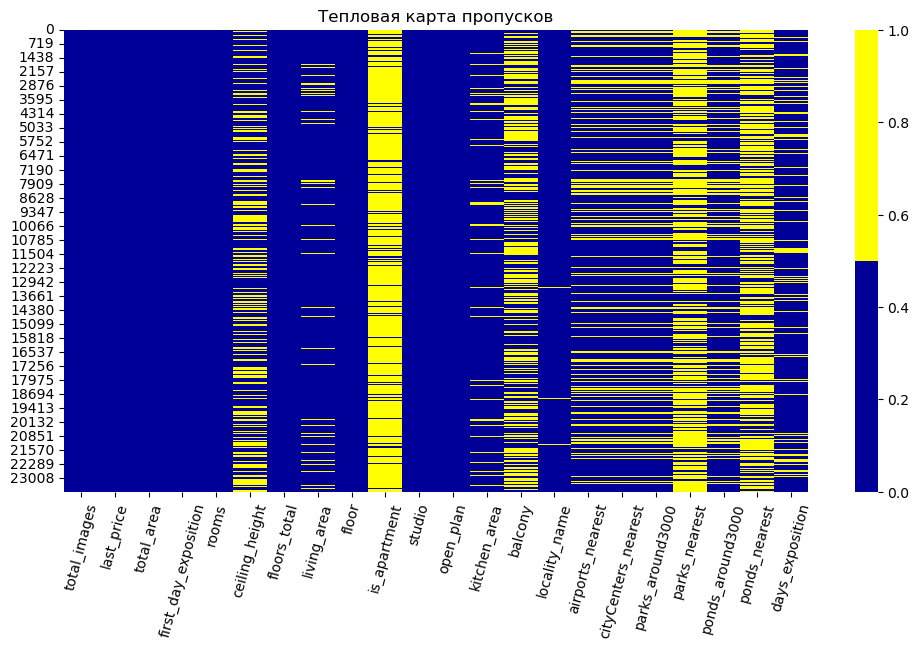

In [7]:
# построли тепловую карту пропусков
cols = data.columns # записали признаки в переменную cols
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 

plt.figure(figsize=(12,6))
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))
plt.title('Тепловая карта пропусков')
plt.xticks(rotation=75)
plt.show()

В 14 стобцах из 22 есть пропущенные значения, больше всего в автоматических столбцах с геоданными

In [8]:
# процентное соотношение количества пропусков
data.shape[0] # посчитали сколько всего значений может быть в столбце
for index in range(len(skip)):
    print('Пропущено значений в столбцe {} - {:.1%}'.format(cols[index], skip[index] / data.shape[0]))

Пропущено значений в столбцe total_images - 0.0%
Пропущено значений в столбцe last_price - 0.0%
Пропущено значений в столбцe total_area - 0.0%
Пропущено значений в столбцe first_day_exposition - 0.0%
Пропущено значений в столбцe rooms - 0.0%
Пропущено значений в столбцe ceiling_height - 38.8%
Пропущено значений в столбцe floors_total - 0.4%
Пропущено значений в столбцe living_area - 8.0%
Пропущено значений в столбцe floor - 0.0%
Пропущено значений в столбцe is_apartment - 88.3%
Пропущено значений в столбцe studio - 0.0%
Пропущено значений в столбцe open_plan - 0.0%
Пропущено значений в столбцe kitchen_area - 9.6%
Пропущено значений в столбцe balcony - 48.6%
Пропущено значений в столбцe locality_name - 0.2%
Пропущено значений в столбцe airports_nearest - 23.4%
Пропущено значений в столбцe cityCenters_nearest - 23.3%
Пропущено значений в столбцe parks_around3000 - 23.3%
Пропущено значений в столбцe parks_nearest - 65.9%
Пропущено значений в столбцe ponds_around3000 - 23.3%
Пропущено знач

Видим, что значительный процент пропусков в данных, которые заполняются автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов. С данным запросом необходимо подойти к разработчикам для проверки системы получения данных из геосервисов, т.к. на основе текущих данных, найденные связи будут не релеватны. Остальные пропуски можно попробовать заполнить.  

#### Заполнение пропусков

In [9]:
data['balcony'].unique() # вывели уникальные значения количества балконов

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [10]:
# заполнили пропущенные значения 0, т.к. можно предположить, что не указали данный параметр из-за его отсутствия
data['balcony'] = data['balcony'].fillna(0) 

In [11]:
data['balcony'].unique() # проверили, что пропущенные значения в данном параметре отсутствуют

array([0., 2., 1., 5., 4., 3.])

In [12]:
# в описании указано, что параметр имеет булев тип, соответственно может быть 2 значения False и True
data['is_apartment'].unique()  

array([nan, False, True], dtype=object)

In [13]:
# предположили, что в отсутствующих значениях признака Аппартаменты - False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [14]:
data['is_apartment'].unique() # проверили, что пропущенные значения в данном параметре отсутствуют

array([False,  True])

In [15]:
# с помощью функции mode() нашли самое распространненое значение в параметре Высота потолков
data['ceiling_height'].mode()

0    2.5
Name: ceiling_height, dtype: float64

In [16]:
# заполнили признак Высота потолков в отсутствующих значениях самым распространенным значением
data['ceiling_height'] = data['ceiling_height'].fillna(2.5)

In [17]:
# заполнили признак название населённого пункта в отсутствующих значениях 'unknown'
data['locality_name'] = data['locality_name'].fillna('unknown')

In [18]:
# как правило жилая прощадь зависит общей площади и составляет определенный % от нее. 
#Найдем данный % по средним данным уже имеющихся значений 
living_space = data['living_area'].mean() / data['total_area'].mean()
living_space

0.5709796633031937

In [19]:
# заполним пропущенные значения процентным соотношений от общей площади
data['living_area'] = data['living_area'].fillna(data['total_area'] * living_space)
data['living_area'].describe() # проверили статистику, что все заполнилось верно

count    23699.000000
mean        34.594076
std         22.354668
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

In [20]:
# сделаем тоже самое с пропусками в признаке площадь кухни
# найдем процентное соотношение от общей площади
kitchen_space = data['kitchen_area'].mean() / data['total_area'].mean()
kitchen_space

0.17514570787846798

In [21]:
# заполним пропущенные значения процентным соотношений от общей площади
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * kitchen_space)
data['kitchen_area'].describe()  # проверили статистику, что все заполнилось верно

count    23699.000000
mean        10.506288
std          6.040000
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [22]:
# есть зависимость от этажа объекта, всего этажей в здании не может быть меньше, чем этаж объекта
# заполним отсутствующие значения в всего этажей количеством этажа квартиры
data['floors_total'] = data['floors_total'].fillna(data['floor'])

In [23]:
data.isna().sum() # проверили заполнение пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заполнили отсутствующие значения в столбцах исходя из логики и здравого смысла. В остальных пропусках логичную замену определить невозможно. Необходимо заполнить багрепорт и направить разработчикам для рассмотрения возможности подтянуть данные из геосервисов.

### Обработка типов данных в столбцах

Установим корректный тип данных в столбцах, чтобы было возможно проводить вычисления и искать взаимосвязи. Так например в столбце first_day_exposition тип данных строка, необходим тип данных дата. Либо не может быть не целое количество балконов, парков или водоемов.

In [24]:
#изменили тип на дату в столбце дата публикации, будет возможность проводить вычисления
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [25]:
data['is_apartment'] = data['is_apartment'].astype('bool') # изменили на булев тип как заявлено в описании

In [26]:
#изменили тип данных на целочисленные в столбцах всего этажей в доме, количество балконов, число парков, число водоемов
for col in ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']:
    data[col] = data[col].astype('int', errors='ignore')

In [27]:
# заменили тип данных с float64 на float32 для экономии памяти
for col in ['last_price', 'total_area', 'ceiling_height', 'living_area', 'kitchen_area',\
              'airports_nearest', 'cityCenters_nearest', 'parks_around3000', \
              'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']:
    data[col] = data[col].astype('float32')

In [28]:
data.dtypes # типы данных признаков датафрейма

total_images                     int64
last_price                     float32
total_area                     float32
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float32
floors_total                     int32
living_area                    float32
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float32
balcony                          int32
locality_name                   object
airports_nearest               float32
cityCenters_nearest            float32
parks_around3000               float32
parks_nearest                  float32
ponds_around3000               float32
ponds_nearest                  float32
days_exposition                float32
dtype: object

Изменили типы данных в столбцах is_apartment, balcony, first_day_exposition, floors_total. Остальные столбцы не смогли изменить, т.к. не заполнены пропуски.

### Обработка дубликатов

Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты.

In [29]:
data['locality_name'].unique() # вывели уникальные значения в столбце с названиями

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [30]:
# устраним неявные дубликаты
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['деревня', 'коттеджный поселок', 'городской поселок', 'поселок городского типа', 'садовое товарищество', \
              'поселок станции', 'поселок', 'село', 'садоводческое некоммерческое товарищество', \
              'поселок при железнодорожной станции'], 'посёлок', regex=True)
)

In [31]:
data['locality_name'].unique() # проверим отсутствие неявных дубликатов

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'посёлок Кудрово', 'Коммунар', 'Колпино',
       'посёлок Красный Бор', 'Гатчина', 'посёлок Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'посёлок Новое Девяткино',
       'посёлок Металлострой', 'посёлок Лебяжье', 'посёлок Сиверский',
       'посёлок Молодцово', 'посёлок Кузьмоловский',
       'посёлок Новая Ропша', 'Павловск', 'посёлок Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'посёлок Куттузи', 'посёлок Аннино', 'посёлок Ефимовский',
       'посёлок Плодовое', 'посёлок Заклинье', 'посёлок Торковичи',
       'посёлок Первомайское', 'Красное Село', 'посёлок Понтонный',
       'Сясьстрой', 'посёлок Старая', 'посёлок Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'посёлок Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'С

In [32]:
data.duplicated().sum() # проверим отсутствие явных дубликатов

0

### Обработка аномальных значений

На гистограммах видны аномалии в признаках, устраним данные аномалии, т.к. в дальнейшем они могут повлиять на расчеты. 

In [33]:
before = data.shape[0] # посчитали начальное значение строк в датафрейме, необходимо для понимания, сколько данных потеряем
before 

23699

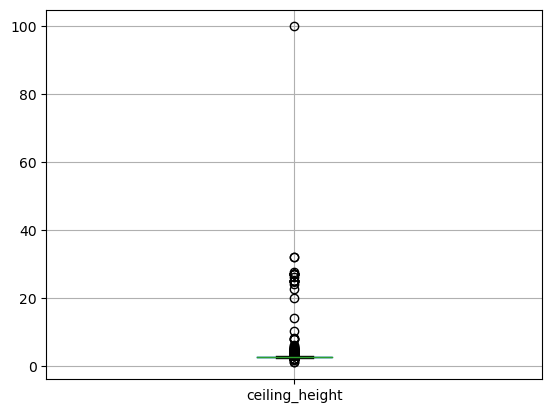

In [34]:
data.boxplot('ceiling_height'); # построили диаграмму размаха для признака Высота потолков

Видим аномальные значения высоты потолков до 100 м.

In [35]:
data['ceiling_height'].describe() # 75% объявлений с потолками 2.7 м

count    23699.000000
mean         2.666160
std          0.995336
min          1.000000
25%          2.500000
50%          2.500000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [36]:
data.loc[355] # вывели одну строку с аномально высоким потолком для изучения

total_images                             17
last_price                        3600000.0
total_area                        55.200001
first_day_exposition    2018-07-12 00:00:00
rooms                                     2
ceiling_height                         25.0
floors_total                              5
living_area                            32.0
floor                                     2
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                       9.668043
balcony                                   2
locality_name                       Гатчина
airports_nearest                        NaN
cityCenters_nearest                     NaN
parks_around3000                        NaN
parks_nearest                           NaN
ponds_around3000                        NaN
ponds_nearest                           NaN
days_exposition                       259.0
Name: 355, dtype: object

In [37]:
# можно предположить, что произошла ошибка и логично, что на самом деле это вещественные значения, 
# например 25 м это 2.5 м или 32 м это 3.2 м.
# обработаем данную анамалию разделив значения на 10
data.loc[data['ceiling_height'] > 19, 'ceiling_height'] = data.query('ceiling_height > 19')['ceiling_height'] / 10
data.loc[355] # проверим как изменились данные на той же строке

total_images                             17
last_price                        3600000.0
total_area                        55.200001
first_day_exposition    2018-07-12 00:00:00
rooms                                     2
ceiling_height                          2.5
floors_total                              5
living_area                            32.0
floor                                     2
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                       9.668043
balcony                                   2
locality_name                       Гатчина
airports_nearest                        NaN
cityCenters_nearest                     NaN
parks_around3000                        NaN
parks_nearest                           NaN
ponds_around3000                        NaN
ponds_nearest                           NaN
days_exposition                       259.0
Name: 355, dtype: object

In [38]:
# предположим, что есть потолки до 10м: частные дома, таунхаусы и двухуровневые квартиры
data = data.query('ceiling_height < 10') #удалим объявления с высотой потолков выше 10 м.

In [39]:
 data.shape[0]

23696

In [40]:
# вызывает интерес стоимость недвижимости, максимальное значение 763 млн.руб. и за 12190 руб.
data['last_price'].describe() # 75 % значений не превышает 6,8 млн.руб. 

count        23696.0
mean       6541284.5
std       10887514.0
min          12190.0
25%        3400000.0
50%        4650000.0
75%        6800000.0
max      763000000.0
Name: last_price, dtype: float64

In [41]:
data.query('last_price < 400000') # насторожила стоимость квартиры за 12190 рублей, посмотрели на данное предложение

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


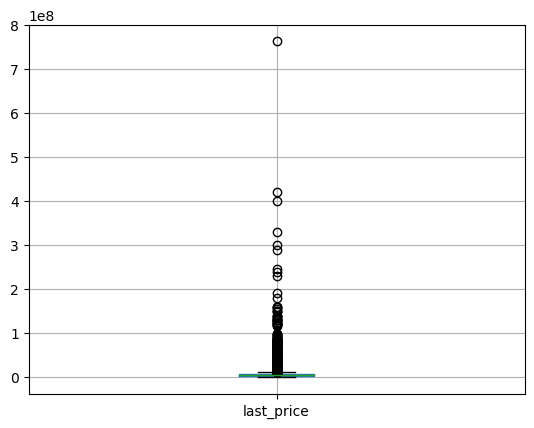

In [42]:
data.boxplot('last_price'); # построили диаграмму размаха для признака цена

Наблюдаем аномальные цены от 20 млн.руб.

In [43]:
#удалим объявления со стоимостью более 20 млн.руб. и за минимальную цену 12190 млн.руб.
data = data.query('last_price < 20000000 and last_price != 12190.0') 

In [44]:
data['last_price'].describe() # проверили статистику после удаления аномалий по цене

count       22972.00
mean      5413271.00
std       3197668.25
min        430000.00
25%       3400000.00
50%       4550000.00
75%       6500000.00
max      19999000.00
Name: last_price, dtype: float64

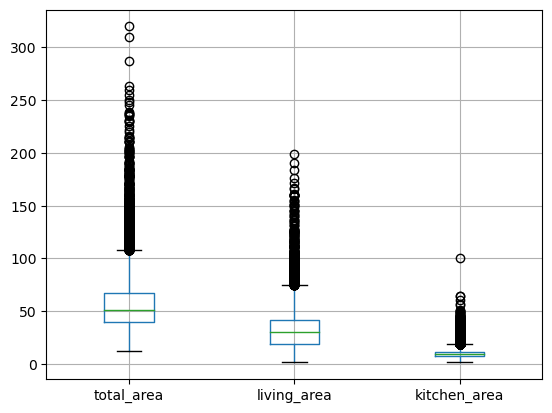

In [45]:
# объединили в группу признаки характеризующие площадь: общая, жилая, площадь кухни
data.boxplot(['total_area', 'living_area', 'kitchen_area']); # построили диаграмму размаха для для данных признаков

In [46]:
data[['total_area', 'living_area', 'kitchen_area']].describe() # вывели статистическое описание данных признаков

,total_area,living_area,kitchen_area
count,22972.000000,22972.000000,22972.000000
mean,56.677929,32.529869,10.010553
std,24.609587,16.527981,4.708066
min,12.000000,2.000000,1.300000
25%,40.000000,18.799999,7.000000
50%,51.000000,30.000000,9.000000
75%,67.000000,41.000000,11.500000
max,320.000000,199.000000,100.699997


Из анализа площади признаков, можно выявить: 75% помещений  - общей площадью 67м2, жилая площадь 41м2 и площадь кухни 11.5м2. Тем не менее можем наблюдать объявления с предложениям по общей площади от 100м2 до 300м2, жилая площадь от 80м2 до 200 м2 и площадь кухни в 75 м5, аномальное значение 100м2

In [47]:
data = data.query('total_area < 270') # удали объявления общей площадью более 270м2

In [48]:
data = data.query('kitchen_area < 75') #удалили объявления с аномально большими кухнями от 75м2

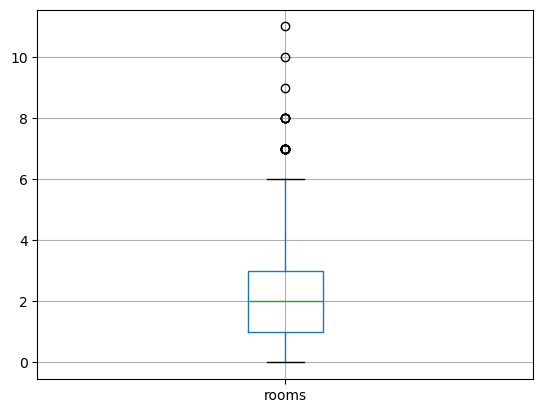

In [49]:
data.boxplot('rooms'); # построили диаграмму размаха для признака количество комнат

In [50]:
data['rooms'].describe() # в 75% объявлениях не более 3 комнат

count    22968.000000
mean         2.008708
std          0.983122
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

In [51]:
data = data.query('rooms <= 6') # удалили выбросы, в которых более 6 комнат

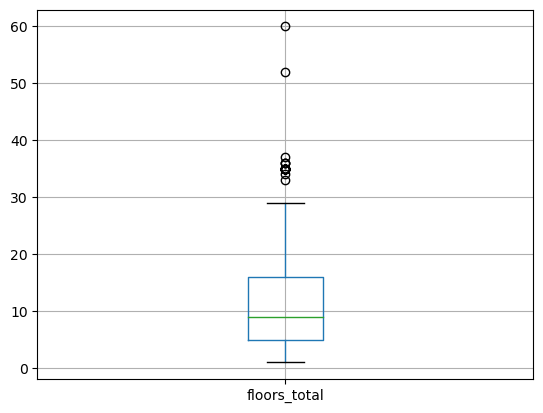

In [52]:
data.boxplot('floors_total');  # построили диаграмму размаха для признака всего этажей в доме

In [53]:
data['floors_total'].describe() # в 75% объявлениях не более 16 этажей

count    22940.000000
mean        10.743810
std          6.632281
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [54]:
data = data.query('floors_total < 30') # удалили выбросы, в которых более 30 этажей

In [55]:
after = data.shape[0]
after

22908

In [56]:
'Потеряли значений после обработки аномалий - {:.1%}'.format((before-after)/before)

'Потеряли значений после обработки аномалий - 3.3%'

В обработке аномальных значениях и выбросах постарались удалить значения, которые не вписываются в общее представление о недвижимости. Постарались сохранить баланс между потерей значений в датасете и сохранением неординарных показателей признаков, чтобы в дальнейшем построить релевантную модель. По результату потеряли не более 3,3% значений после обработки. 

## Добавьте в таблицу новые столбцы

### Добавление столбца цена одного квадратного метра

In [57]:
data['price_one_square_metr'] = round(data['last_price'] / data['total_area'], 2) # цена одного квадратного метра

### Добавление столбцов день недели публикации объявления (0 — понедельник, 1 — вторник и так далее), месяц публикации объявления, год публикации объявления

In [58]:
data['day_of_week'] = data['first_day_exposition'].dt.weekday # день недели публикации объявления 

In [59]:
data['month'] = data['first_day_exposition'].dt.month # месяц публикации объявления

In [60]:
data['year'] = data['first_day_exposition'].dt.year# год публикации объявления

### Добавление столбца определяющий тип этажа: первый, последний или другой

In [61]:
def floor_type(row): # создали функцию для определения категории типа этажа
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)
data.head() # вывели 5 строк для просмотра таблицы 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_metr,day_of_week,month,year,floor_type
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.367188,3,3,2019,другой
1,7,3350000.0,40.400002,2018-12-04,1,2.50,11,18.600000,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.789062,1,12,2018,первый
2,10,5196000.0,56.000000,2015-08-20,2,2.50,5,34.299999,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.710938,3,8,2015,другой
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой
5,10,2890000.0,30.400000,2018-09-10,1,2.50,12,14.400000,5,False,False,False,9.1,0,посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789062,0,9,2018,другой


### Изменение столбца расстояние до центра города в километрах (перевод из м в км и округление до ближайших целых значений)

In [62]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000, 0) # добавили новый столбец в км

In [63]:
data[['cityCenters_nearest', 'cityCenters_nearest_km']].head(10) # вывели столбцы для проверки

,cityCenters_nearest,cityCenters_nearest_km
0,16028.0,16.0
1,18603.0,19.0
2,13933.0,14.0
4,8098.0,8.0
5,NaN,NaN
6,19143.0,19.0
7,11634.0,12.0
8,NaN,NaN
9,15008.0,15.0
10,13878.0,14.0


## Проведите исследовательский анализ данных

### Изучение параметров объектов

Изучим приведенные ниже парметры. На предущем этапе обработка аномалий, удалили значения, которые на наш взгляд являются неординарными и могут повлиять на расчет модели. Посмотрим как это повлияло на отображение гистограмм.

#### Общая площадь

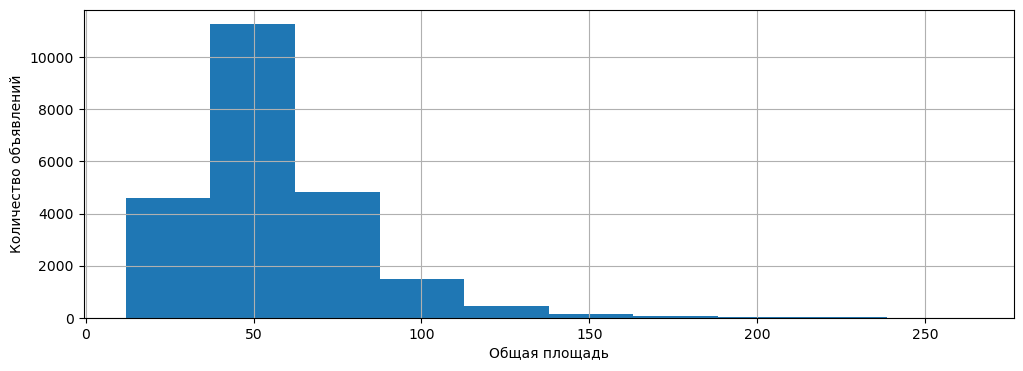

In [64]:
data['total_area'].plot(kind='hist', grid=True, figsize=(12, 4)) # построили гистограмму общей площади
plt.xlabel('Общая площадь')
plt.ylabel('Количество объявлений')
plt.show()

Гистограмма смещена влево с длинным хвостом. Что характерно для помещений - чем выше площадь, тем меньше помещений, соответственно и меньше будет предложений по продаже

#### Жилая площадь

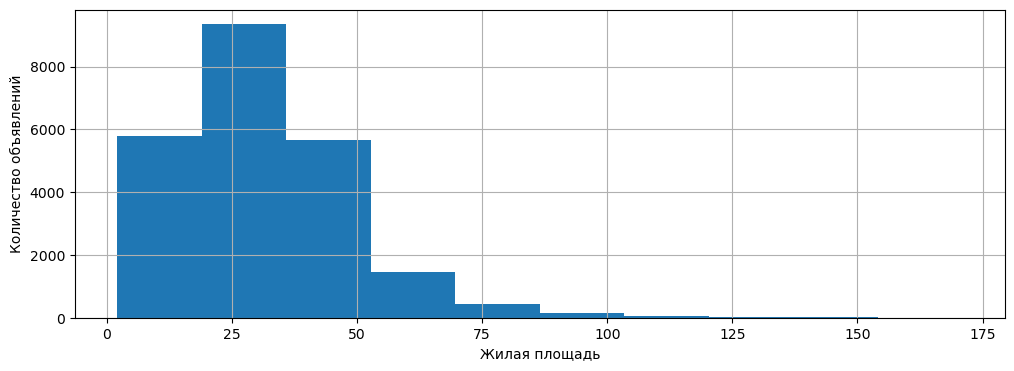

In [65]:
data['living_area'].plot(kind='hist', grid=True, figsize=(12, 4)) # построили гистограмму жилой площади
plt.xlabel('Жилая площадь')
plt.ylabel('Количество объявлений')
plt.show()

Гистограмма смещена влево с длинным хвостом. Что характерно для помещений - чем выше площадь, тем меньше помещений, соответственно и меньше будет предложений по продаже

#### Площадь кухни

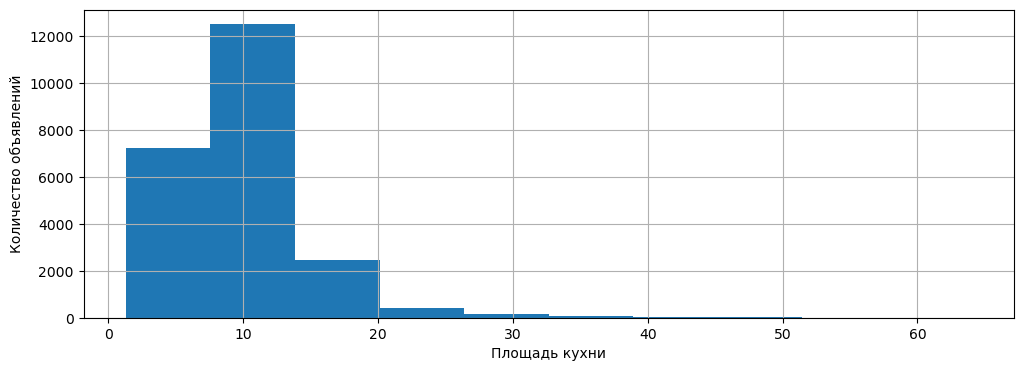

In [66]:
data['kitchen_area'].plot(kind='hist', grid=True, figsize=(12, 4)) # построили гистограмму площади кухни
plt.xlabel('Площадь кухни')
plt.ylabel('Количество объявлений')
plt.show()

Аналогично и для площади кухни распределение гистограмы смещено влево с длинным хвочтом. На рынке не так много предложений с большой кухней.

#### Цена объекта

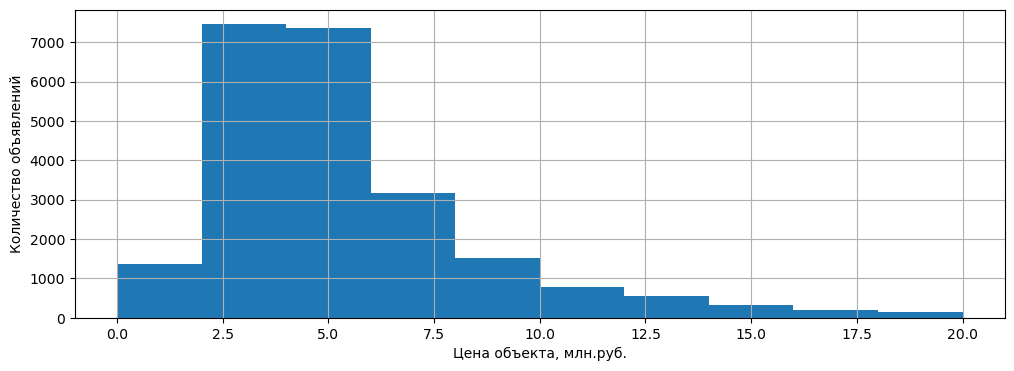

In [67]:
(data['last_price'] / 1000000).plot(kind='hist', grid=True, figsize=(12, 4), range=(0, 20)) # построили гистограмму цены объекта
plt.xlabel('Цена объекта, млн.руб.')
plt.ylabel('Количество объявлений')
plt.show()

Распределение диаграммы смещено влево с длинным хвотом. Преобладают объявления по продаже объектов от 2 млн.руб до 6 млн.руб.

#### Количество комнат

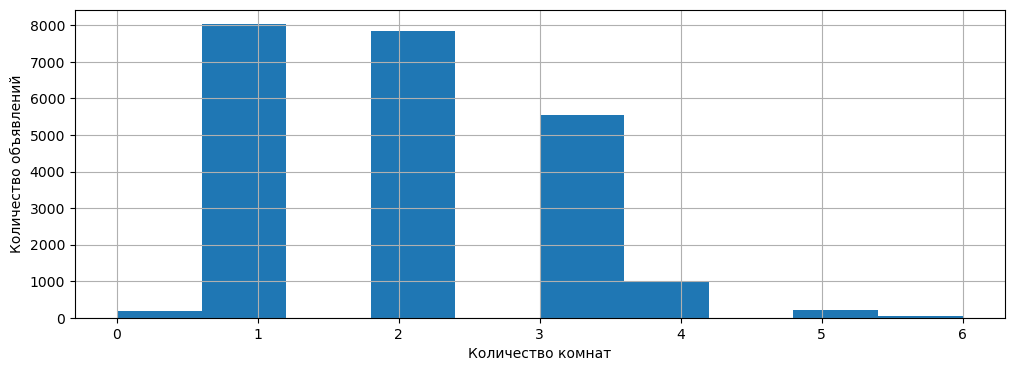

In [68]:
data['rooms'].plot(kind='hist', grid=True, figsize=(12, 4)) # построили гистограмму количетства комнат
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

На рынке преобладают предложения по продаже 1 и 2 комнатых помещений.

#### Высота потолков

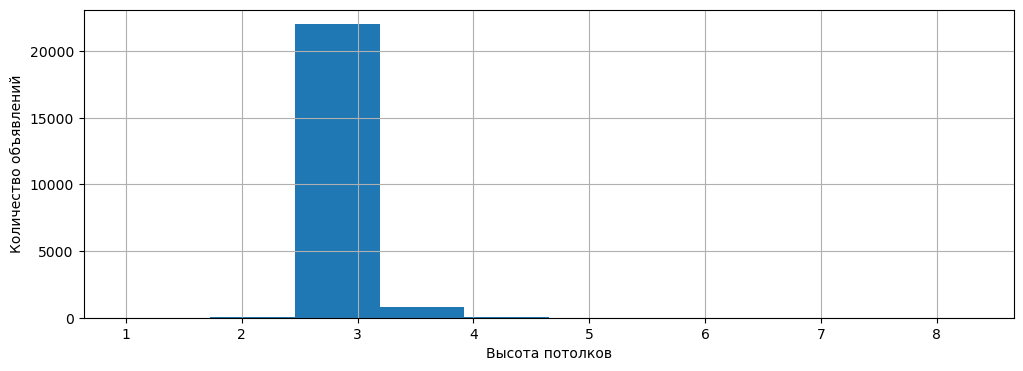

In [69]:
data['ceiling_height'].plot(kind='hist', grid=True, figsize=(12, 4)) # построили гистограмму высоты потолков
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')
plt.show()

Почти все предложения с высотой потолков 2.5 или 3.2 метра

#### Тип этажа квартиры

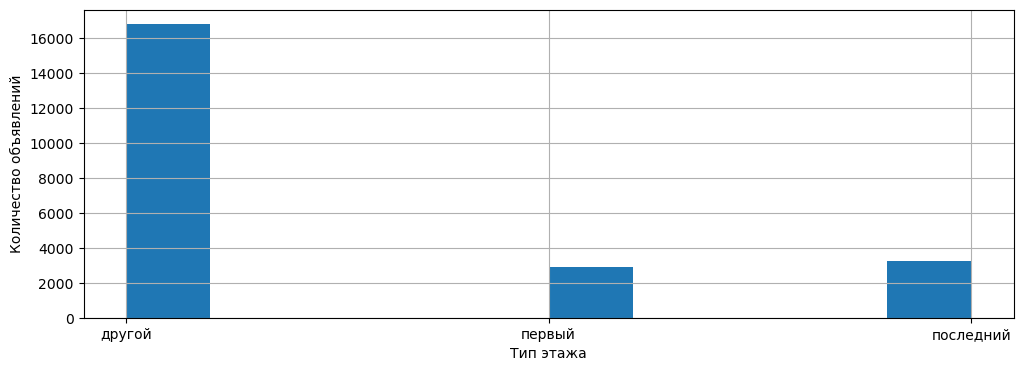

In [70]:
data['floor_type'].hist(figsize=(12, 4)) # построили гистограмму типа этажа квартиры 
plt.xlabel('Тип этажа')
plt.ylabel('Количество объявлений')
plt.show()

Больше всего предложений с типом этажа другой, что логично т.к. в совокупности квартир на 1 и последнем меньше, чем сумма всех остальных.

#### Общее количество этажей в доме

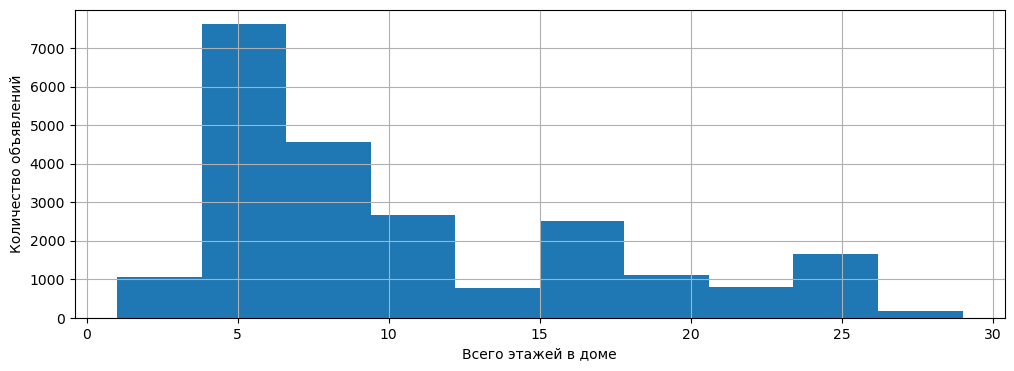

In [71]:
data['floors_total'].plot(kind='hist', grid=True, figsize=(12, 4)) # построили гистограмму общего количетсва этажей в доме
plt.xlabel('Всего этажей в доме')
plt.ylabel('Количество объявлений')
plt.show()

Преобладают продажи квартир в 5 этажных зданиях, что тоже логично, ведь в Санкт-Петербурге в большинстве случаев строились 5 этажные дома и было ограничение на высоту здания.

#### Расстояние до центра города в метрах

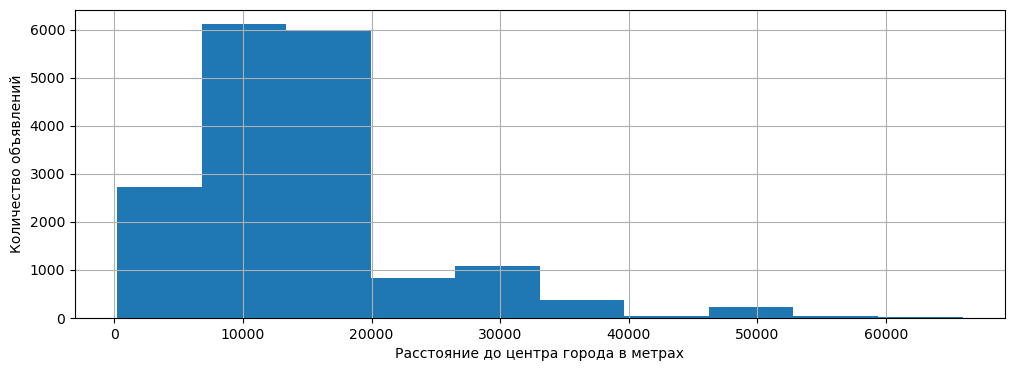

In [72]:
data['cityCenters_nearest'].plot(kind='hist', grid=True, figsize=(12, 4)) # построили гистограмму расстояния до центра города
plt.xlabel('Расстояние до центра города в метрах')
plt.ylabel('Количество объявлений')
plt.show()

Больше всего объявлений по продаже квартир на расстоянии от центра в 7-20 километров. Т.к. Санкт-Петербург это мегаполис и центр города - это район с высокой деловой активностью, предложений по продаже жилой недвижимости будет меньше.  Больше предложений будет в спальных районах города - которые как раз и на данном расстоянии.

#### Расстояние до ближайшего парка

Text(0, 0.5, 'Количество объявлений')

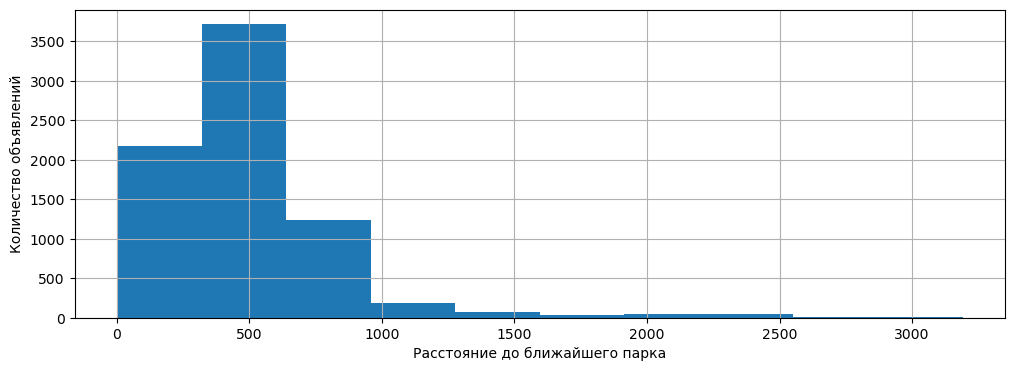

In [73]:
data['parks_nearest'].plot(kind='hist', grid=True, figsize=(12, 4)) # построили гистограмму расстояния до ближайшего парка
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество объявлений')

Санкт-Петербург - город парков, гистограмма это и показывает, большинство предложений на расстоянии от парка 400-600 метров.

### Скорость продажи квартир

Text(0, 0.5, 'Количество объявлений')

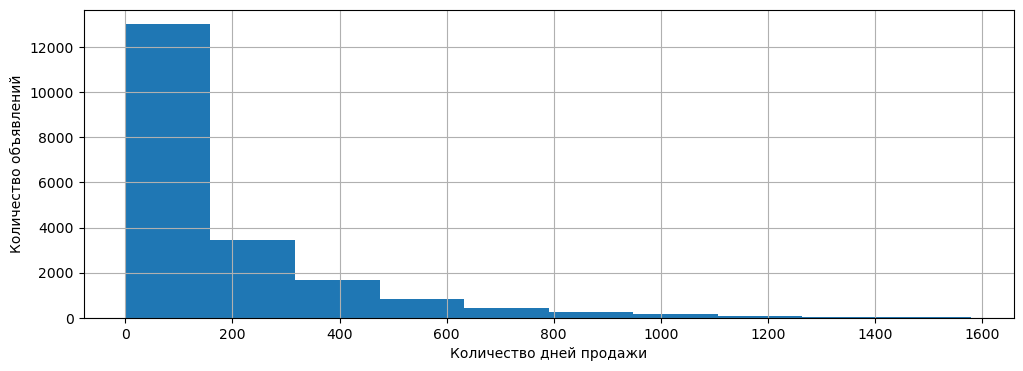

In [74]:
data['days_exposition'].plot(kind='hist', grid=True, figsize=(12, 4)) # построили гистограмму скорости продажи квартир
plt.xlabel('Количество дней продажи')
plt.ylabel('Количество объявлений')

Text(0, 0.5, 'Количество объявлений')

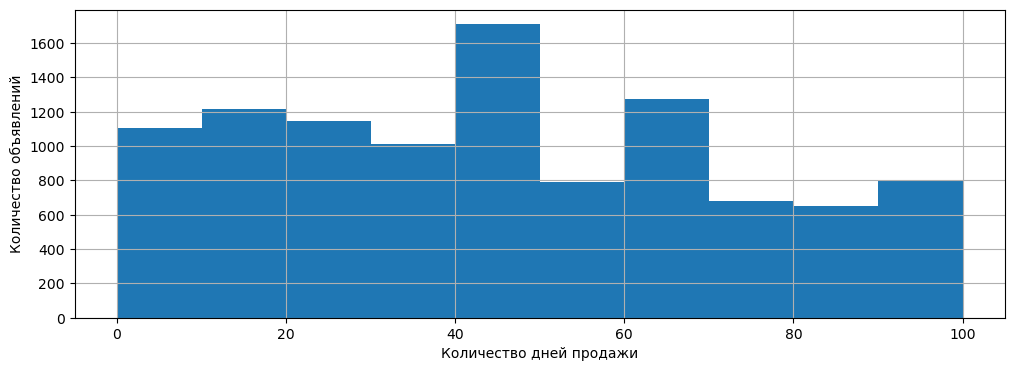

In [75]:
# построили гистограмму скорости продажи квартир в диапазоне от 0 до 100 дней.
data['days_exposition'].plot(kind='hist', grid=True, figsize=(12, 4), range=(0, 100))
plt.xlabel('Количество дней продажи')
plt.ylabel('Количество объявлений')

In [76]:
data['days_exposition'].mean() # посчитали среднию скорость продажи

177.83597

In [77]:
data['days_exposition'].median() # посчитали медианную скорость продажи

94.0

In [78]:
data['days_exposition'].describe() # вывели статистику по квантилям скорости продажи

count    19948.000000
mean       177.835968
std        216.511383
min          1.000000
25%         44.000000
50%         94.000000
75%        227.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем квартиры продавались за 177 дней, тем не менее 50% продаж прошло за 3 месяца. Самыми быстрыми продажами можно считать продажи до 1,5 месяца, а самыми длинными от 7,5 месяцев. Если посмотреть более пристально на диапазон количества дней продажи от 0 до 100 дней, можно увидеть пики в 40-50 дней и 60-70 дней. Могу предположить, что это происходит с самим процессом продажи, когда две стороны встретились и договорились: нужно время на проверку, нотариуса, взятие ипотеки, регистрацию недвижимости в росреестре за новым владельцем, исправление ошибок.

### Факторы, которые больше всего влияют на общую (полную) стоимость объекта

#### Зависимость цены от общей площади

In [79]:
data['last_price'].corr(data['total_area']) # посчитали корреляцию цены и общей площади

0.7729548033219654

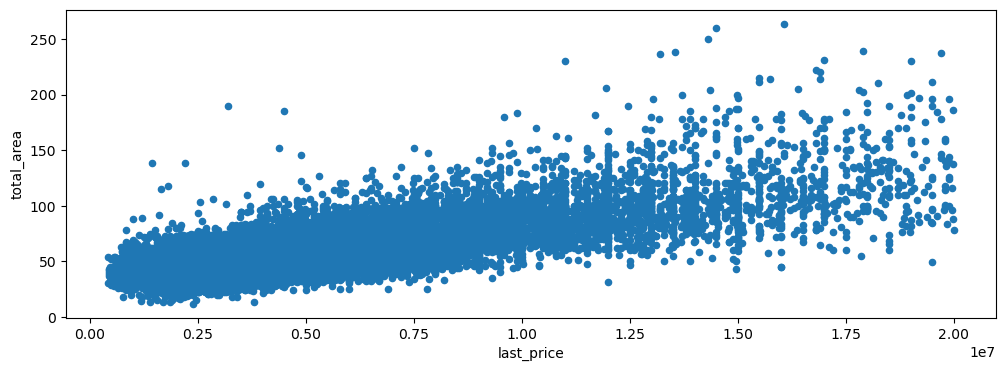

In [80]:
# отобразили разброс объектов в зависимости от цены и общей площади
data.plot(x='last_price', y='total_area', kind='scatter', figsize=(12, 4))
plt.show()

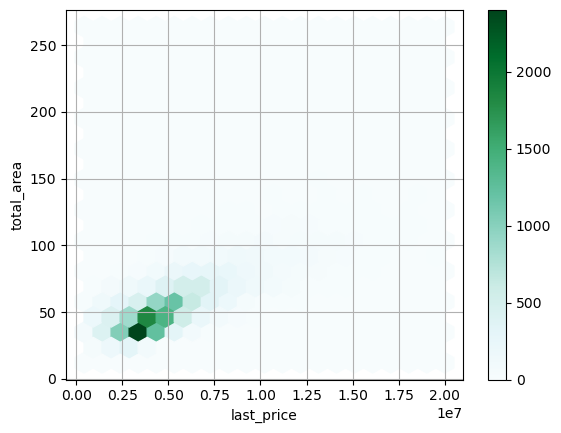

In [81]:
# построили диаграмму по типу  hexbin
data.plot(x='last_price', y='total_area', kind='hexbin', gridsize=20, sharex=False, grid=True)
plt.show()

Из расмотренных графиков можно утверждать, что чем выше общая площадь, тем выше цена объекта. Коээффициент корреляции Пирсона это подтверждает, он составляет 0.77. Тем не менее из-за того что пользуются популярностью помещения от 45м2 до 70м2 с ценой в диапазоне от 2,5 до 5 млн.руб. - их больше всего строили и теперь по ним больше всего предложений.

#### Зависимость цены от жилой площади

In [82]:
data['last_price'].corr(data['living_area']) # посчитали корреляцию цены и жилой площади

0.6684499175509716

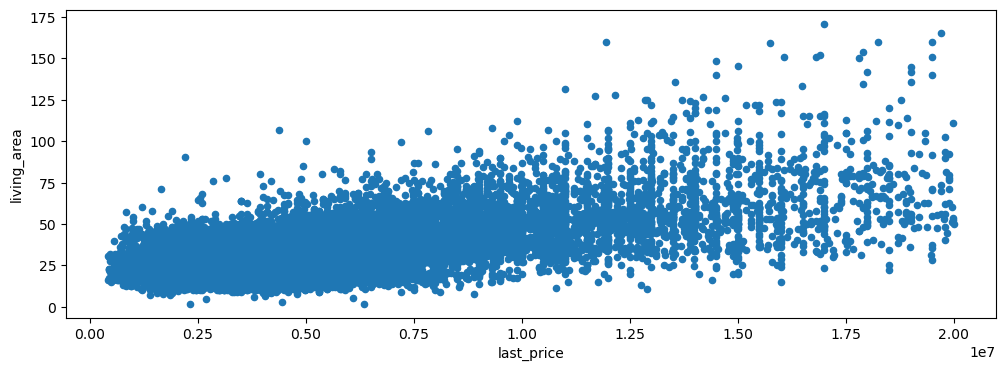

In [83]:
# отобразили разброс объектов в зависимости от цены и жилой площади
data.plot(x='last_price', y='living_area', kind='scatter', figsize=(12, 4))
plt.show()

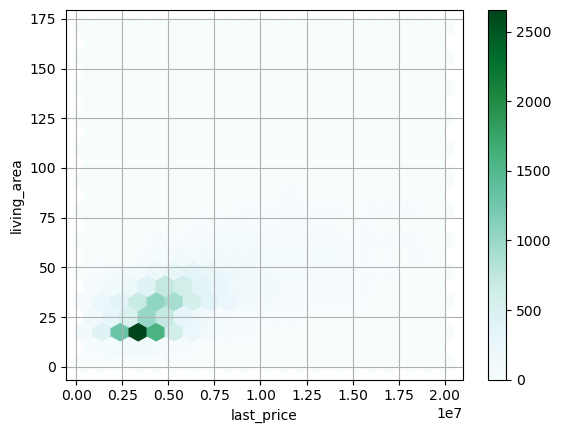

In [84]:
# построили диаграмму по типу  hexbin
data.plot(x='last_price', y='living_area', kind='hexbin', gridsize=20, sharex=False, grid=True)
plt.show()

Как и в предыдущем пункте из расмотренных графиков можно утверждать, что чем выше жилая площадь, тем выше цена объекта. Коээффициент корреляции Пирсона это подтверждает, он составляет 0.67. Ниже чем в общей площади, из-за того, что уделяется внимание и не жилой площади: кухня, ванная, коридор. Преобладают объявления жилой площади от 15 до 23 м2 - что характерно для 1 и 2 комнатных квартир с ценой в диапазоне от 2,5 до 4 млн.руб.

#### Зависимость цены от площади кухни

In [85]:
data['last_price'].corr(data['kitchen_area']) # посчитали корреляцию цены и площади кухни

0.5976914084089751

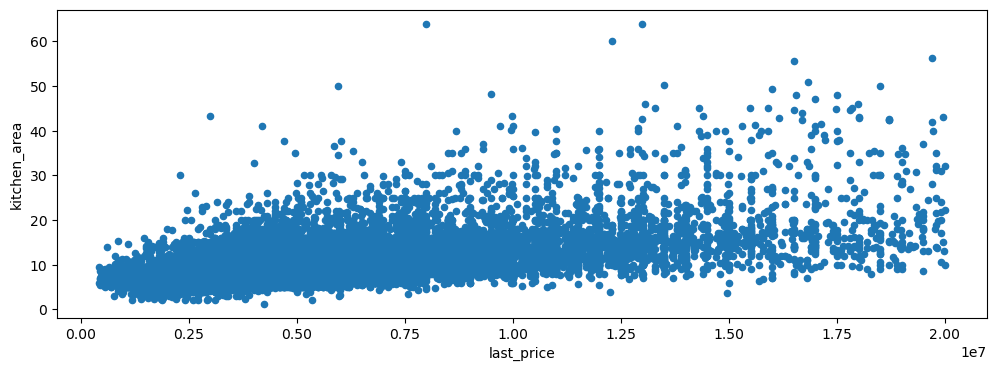

In [86]:
# отобразили разброс объектов в зависимости от цены и площади кухни
data.plot(x='last_price', y='kitchen_area', kind='scatter', figsize=(12, 4))
plt.show()

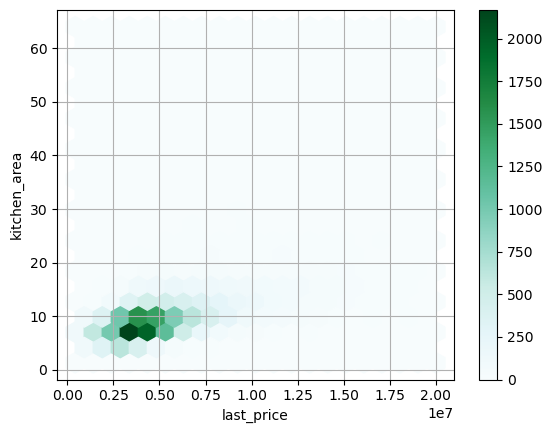

In [87]:
# построили диаграмму по типу  hexbin
data.plot(x='last_price', y='kitchen_area', kind='hexbin', gridsize=20, sharex=False, grid=True)
plt.show()

Из рассмотренных графиков как и в двух предыдущих пунктах, площадь кухни коррелирует с ценой - чем выше площадь, тем выше цена. Коффециент корреляции Пирсона составляет 0.6. Больше всего объявлений по продаже квартир с площадью кухни от 7 до 11 м2, с диапазоном цен от 2,5 до 5 млн.руб.

#### Зависимость цены от количества комнат

In [88]:
data['last_price'].corr(data['rooms']) # посчитали корреляцию цены и количества комнат 

0.5030935650360515

In [89]:
# построили сводную таблицу по количеству комнат со средней ценой и количеством объявлений
rooms = data.pivot_table(index='rooms', values='last_price', aggfunc=['mean', 'count'])
rooms.columns = ['mean', 'count']
rooms

,mean,count
rooms,,
0,2987070.25,194
1,3794954.50,8025
2,5323160.50,7845
3,6941288.50,5559
4,8907994.00,1004
5,11273632.00,224
6,13832502.00,57


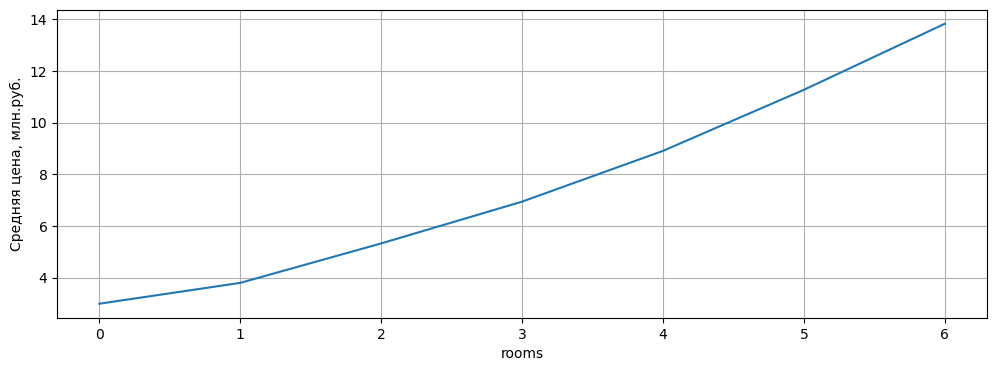

In [90]:
# построили график зависимости средней цены от количества комнат
(rooms['mean']/1000000).plot(grid=True, figsize=(12, 4))
plt.ylabel('Средняя цена, млн.руб.')
plt.show()

Из графика видно, что чем больше комнат тем выше цена. Коэффициэт корреляции пирсона это подтверждает - составляет 0.5

#### Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)

In [91]:
# построили сводную таблицу по типу этажа со средней ценой и количеством объявлений
floor_type = data.pivot_table(index='floor_type', values='last_price', aggfunc=['mean', 'count'])
floor_type.columns = ['mean', 'count']
floor_type.sort_values('mean', inplace=True)

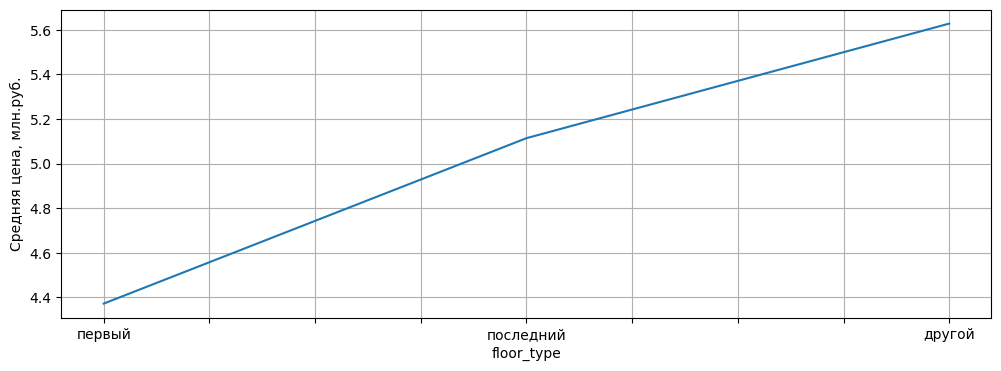

In [92]:
# построили график зависимости средней цены от типа этажа
(floor_type['mean']/1000000).plot(grid=True, figsize=(12, 4)) 
plt.ylabel('Средняя цена, млн.руб.')
plt.show()

Из графика можно наблюдать, что самые дешевые квартиры на 1 этаже, далее идут квартиры на последнем этаже.

#### Зависимость цены от даты размещения (день недели, месяц, год)

In [93]:
# построили сводную таблицу по дням недели со средней ценой и количеством объявлений
day_of_week = data.pivot_table(index='day_of_week', values='last_price', aggfunc=['mean', 'count'])
day_of_week.columns=['mean', 'count']
day_of_week

,mean,count
day_of_week,,
0,5370755.5,3485
1,5459386.5,4062
2,5476520.5,3843
3,5472407.5,4120
4,5350748.0,3878
5,5231350.0,1876
6,5224013.0,1644


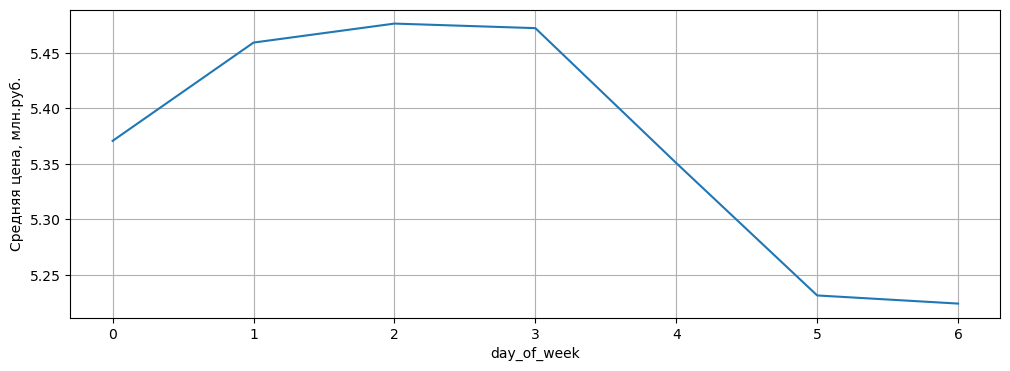

In [94]:
# построили график зависимости средней цены от дня недели
(day_of_week['mean']/1000000).plot(grid=True, figsize=(12, 4))
plt.ylabel('Средняя цена, млн.руб.')
plt.show()

На графике видно, что объявления, выложенные со вторника по четверг оказываются дороже, чем с пятницы по понедельник. Отдохнувшие люди в выходные ставят цену ниже, чем обычно.

In [95]:
# построили сводную таблицу по месяцам со средней ценой и количеством объявлений
month = data.pivot_table(index='month', values='last_price', aggfunc=['mean', 'count'])
month.columns = ['mean', 'count']
month

,mean,count
month,,
1,5375290.5,1439
2,5371756.5,2547
3,5375734.5,2511
4,5509494.0,2310
5,5381968.0,1231
6,5155994.0,1698
7,5376666.0,1631
8,5415734.5,1692
9,5556018.0,1920


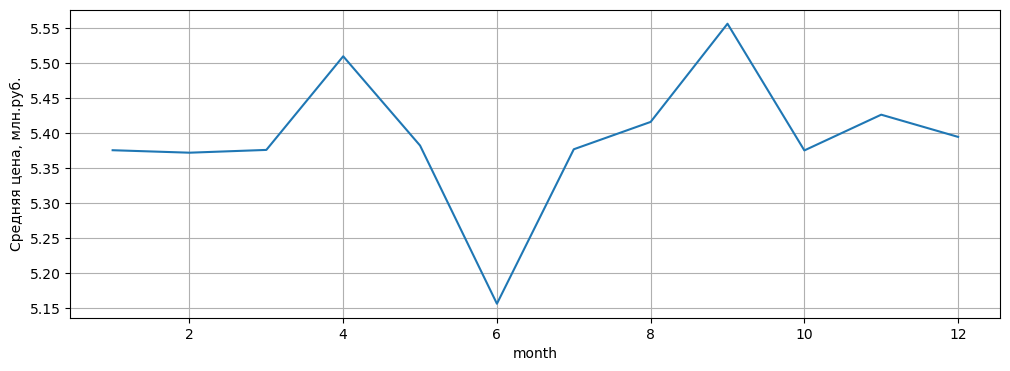

In [96]:
# построили график зависимости средней цены от месяца
(month['mean']/1000000).plot(grid=True, figsize=(12, 4))
plt.ylabel('Средняя цена, млн.руб.')
plt.show()

На графике можно наблюдать, что зимой и осенью цены на одном уровне. Видим пики в начале весны и в начале осени, что характерно для психологии людей - активность людей в это время выше, спрос выше, и соответсвенно поднимают цены. Лето - время отпусков, никто ничего покупать не хочет, а продавать нужно - цена на объекты снижается.

In [97]:
# построили сводную таблицу по годам со средней ценой и количеством объявлений
year = data.pivot_table(index='year', values='last_price', aggfunc=['mean', 'count'])
year.columns = ['mean', 'count']
year

,mean,count
year,,
2014,8038463.5,117
2015,6133430.5,1116
2016,5380408.0,2679
2017,5301364.0,7907
2018,5262271.5,8313
2019,5682823.5,2776


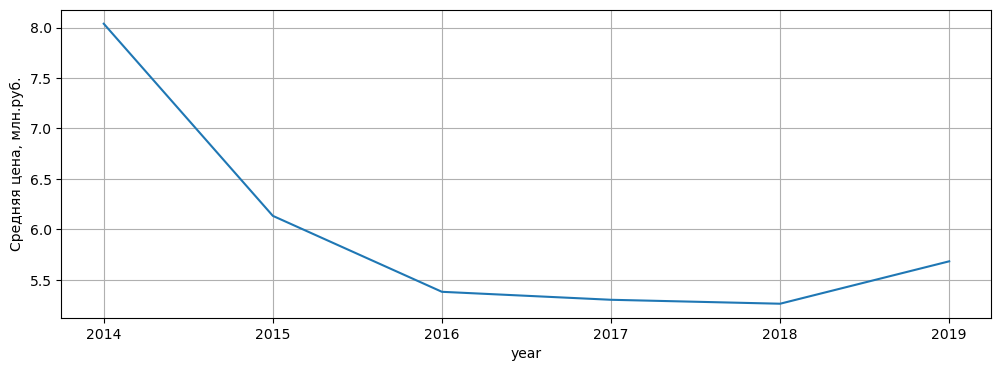

In [98]:
# построили график зависимости средней цены от года
(year['mean']/1000000).plot(grid=True, figsize=(12, 4))
plt.ylabel('Средняя цена, млн.руб.')
plt.show()

Анализируя временные интервалы можно наблюдать снижение цены с 2014 года по 2018, что связано с кризисом, ростом ставок по ипотеке. Самый лучший год для покупки был 2018, цены на минимуме, ставки по ипотеке уже на приемлемых уровнях.

### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [99]:
# построили сводную таблицу по населенному пункту со средней ценой 1 кв.м и количеством объявлений
price_one_square_metr = data.pivot_table(index='locality_name', values='price_one_square_metr', aggfunc=['mean', 'count'])
price_one_square_metr.columns=['mean', 'count']
price_one_square_metr.sort_values('count', ascending=False, inplace=True)
# отфильтровали и оставили 10 населенных пунктов, у которых больше всего объявлений
price_one_square_metr = price_one_square_metr[:10] 

In [100]:
price_one_square_metr # вывели 10 населённых пунктов с наибольшим числом объявлений

,mean,count
locality_name,,
Санкт-Петербург,108619.765625,14952
посёлок Мурино,85681.765625,556
посёлок Шушары,78677.367188,440
Всеволожск,67214.250000,397
Пушкин,101788.578125,360
Колпино,75333.296875,337
посёлок Парголово,90332.265625,326
Гатчина,68746.148438,307
посёлок Кудрово,92473.546875,299


In [101]:
print(
    'Населенный пунк {} c самой высокой ценой 1 м2  - {:.2f}'
    .format(price_one_square_metr.index[0], price_one_square_metr['mean'].max())
)

Населенный пунк Санкт-Петербург c самой высокой ценой 1 м2  - 108619.77


In [102]:
print(
    'Населенный пунк {} c самой низкой ценой 1 м2  - {:.2f}'
    .format(price_one_square_metr.index[9], price_one_square_metr['mean'].min())
)

Населенный пунк Выборг c самой низкой ценой 1 м2  - 58141.91


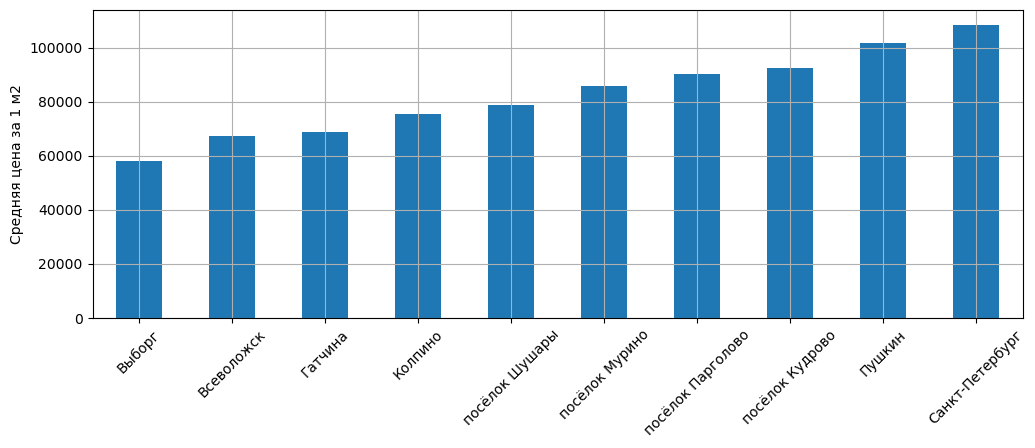

In [103]:
price_one_square_metr['mean'].sort_values().plot(kind='bar', grid=True, figsize=(12, 4))
plt.ylabel('Средняя цена за 1 м2')
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()

Наибольшее число объявлений в Санкт-Петербурге, как следствие и самая высокая цена за 1 м2 тоже тут. Замыкает список на 10 месте город Выборг, там меньше всего объявлений и меньше всего стоимость 1 м2.

### Зависимость цены объектов в Санкт-Петербурге от расстояния до центра города

In [104]:
# построили сводную таблицу по удаленности от центра со средней ценой и количеством объявлений
cityCenters_nearest = data[data['locality_name'] == 'Санкт-Петербург'].pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc=['mean', 'count'])
cityCenters_nearest.columns = ['mean', 'count']
cityCenters_nearest

,mean,count
cityCenters_nearest_km,,
0.0,10198571.0,14
1.0,10440392.0,153
2.0,9895917.0,252
3.0,8911942.0,317
4.0,9297479.0,610
5.0,9294883.0,768
6.0,8517019.0,503
7.0,7918315.5,337
8.0,7852554.0,551


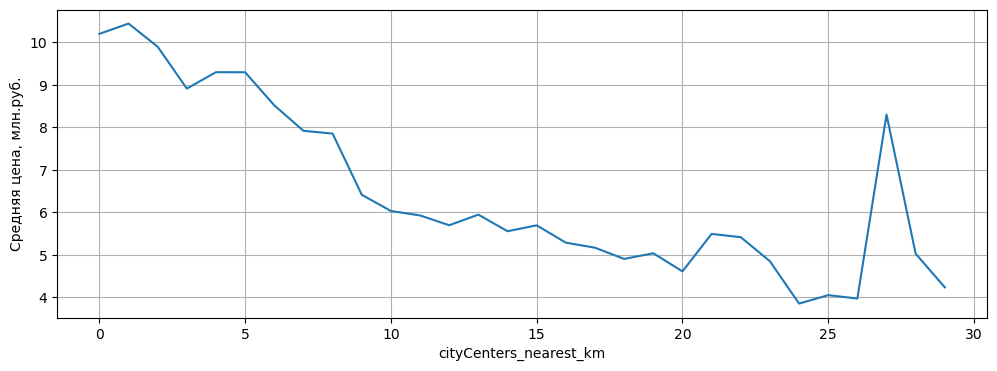

In [105]:
# построили график зависимости цены от удаленности от центра
(cityCenters_nearest['mean']/1000000).plot(grid=True, figsize=(12, 4))
plt.ylabel('Средняя цена, млн.руб.')
plt.show()

In [106]:
# посмотрели на выброс на графике
data.query('locality_name == "Санкт-Петербург" and  cityCenters_nearest_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_metr,day_of_week,month,year,floor_type,cityCenters_nearest_km
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,False,False,25.0,0,Санкт-Петербург,23888.0,27313.0,1.0,1496.0,0.0,NaN,128.0,193918.921875,1,11,2017,другой,27.0
5961,6,2250000.0,32.0,2018-02-27,1,2.50,2,16.5,2,False,False,False,7.0,0,Санкт-Петербург,24006.0,27431.0,0.0,NaN,0.0,NaN,178.0,70312.500000,1,2,2018,последний,27.0


Очевидная тендеция, что чем дальше от центра города, тем дешевле квартиры. Есть выброс по 1 объявлению в 27 км. от центра, там 2-х комнатная квартира общей площадью 74 м2 стоит 14,35 млн.руб. На данном расстоянии находится курортный район Санкт-Петербурга возле финского залива. Можем предположить, что это редкое эксклюзивное предложение вип жилья.

## Напишите общий вывод

Для проведения исследования были получены данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Целью исследования является выявить и установить параметры, влияющие на цену объектов, что позволит построить автоматизированную систему: сможет отслеживать аномалии и мошенническую деятельность.
На стадии предобработки данных были выявлены пропуски в более чем половина столбцов. Пропуски в столбцах, которые вписывались пользователями, заполнили на основе уже имеющихся данных. В столбцах, которые получены автоматически из геосервисов, наблюдался большой процент пропусков и логики для их заполнения не было выявлено. С запросом корректировки хотелось бы обратиться к ответственным за помощью, в противном случае данные могут быть не релевантные.
Далее выявили и удалили аномальные значения и выбросы в данных с целью более точного расчета влияния параметров на цену объектов. 
Для проведения исследовательского анализа данных добавили несколько столбцов, преобразовал из текущих: цена 1 м2, день недели, месяц, год, тип этажа, расстояние в км от центра города.
Изучили следующие параметры объектов недвижимости: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, тип этажа квартиры, общее количество этажей, расстояние до центра города и ближайшего парка. 
На гистограммах параметров: общая площадь, жилая площадь, площадь кухни, цена объекта можем наблюдать смещенное нормальное распределение влево с хвостом справа. На остальных гистограммах можем наблюдать появление одних значений более чаще чем других, характерно для распределения Пуассона.
Изучили скорость продажи объектов и выявили, что половина объявлений была продана за 3 месяца, самые быстрые продавались до 1,5 месяцев, самые долгие более 7,5 месяцев.
Далее проанализировали факторы, которые больше всего влияют на цену. С ценой очень сильно коррелирует общая площадь объекта и как следствие жилая площадь и площадь кухни, которые являются ее составляющей. Чем больше общая площадь объекта, тем, как правило и больше комнат, здесь также наблюдается положительная динамика в цене.
На цену также влияет тип этажа квартиры, не охотно покупают квартиры на первом и последних этажах, поэтому продавцам приходится снижать цену. 
Самые дорогие квартиры в Санкт-Петербурге, и чем ближе к центру, тем дороже.
Из графика можем наблюдать нелинейную зависимость между ценой и датой публикации объявления, для модели эти данные будут бесполезны, тем не менее, показались интересными. Так цена в объявлениях, выложенных со вторника по четверг выше, чем, например, в выходные. Пики цен можем наблюдать в апреле и сентябре. 
Таким образом на цену объекта недвижимости значительно влияет: локация, тип этажа квартиры и общая площадь, а также ее составляющие жилая площадь, площадь кухни, количество комнат.
Для построения автоматизированной системы каждому параметру нужно рассчитать коэффициенты, которые при заполнении объявления будут рассчитывать свою цену объекта и далее сравнивать с ценой, предложенной продавцом. Если идет значительное отличие отправлять объявление на модератора.
